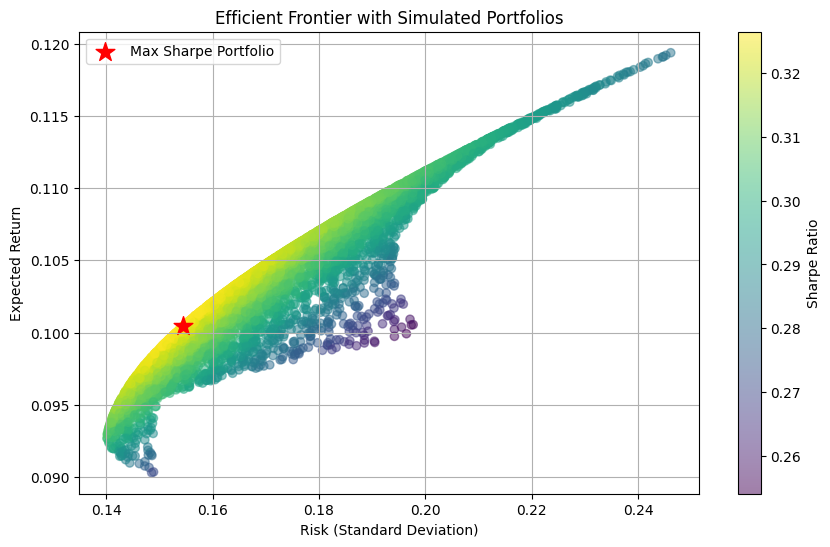

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: Expected returns and standard deviations
assets = ['Reliance', 'Infosys', 'HDFC Bank']
expected_returns = np.array([0.10, 0.12, 0.09])
std_devs = np.array([0.20, 0.25, 0.15])

# Correlation matrix (assumed)
correlation_matrix = np.array([
    [1.0, 0.6, 0.4],
    [0.6, 1.0, 0.5],
    [0.4, 0.5, 1.0]
])

# Covariance matrix
cov_matrix = np.outer(std_devs, std_devs) * correlation_matrix

# Simulate random portfolios
num_portfolios = 10000
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(3)
    weights /= np.sum(weights)
    
    # Expected return
    port_return = np.dot(weights, expected_returns)
    
    # Portfolio standard deviation
    port_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # Sharpe ratio (assume risk-free rate = 0.05)
    sharpe_ratio = (port_return - 0.05) / port_std
    
    results[0, i] = port_return
    results[1, i] = port_std
    results[2, i] = sharpe_ratio

# Find the portfolio with the maximum Sharpe Ratio
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_std = results[1, max_sharpe_idx]

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', alpha=0.5)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_std, max_sharpe_return, color='red', label='Max Sharpe Portfolio', marker='*', s=200)
plt.title('Efficient Frontier with Simulated Portfolios')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()
